# Dirichlet Process

In [1]:
import numpy as np 
import scipy.stats as stats 
import matplotlib.pyplot as plt 

In [2]:
def stick_breaking_truncated(α, H, K):
    """
    Truncated stick-breaking process view of a DP
    org: https://github.com/aailabkaist/Introduction-to-Artificial-Intelligence-Machine-Learning
    ref: https://seslab.kaist.ac.kr/xe2/page_lMmY25, 2.4 Stick Breaking Construction
    
    Parameters
    ----------
    α : float
        concentration parameter
    H : scipy distribution
        Base distribution
    K : int
        number of components
    
    Returns
    -------
    locs : array
        locations
    w : array
        probabilities
    """
    βs = stats.beta.rvs(1, α, size=K)
    w = np.empty(K)
    w = βs * np.concatenate(([1.], np.cumprod(1 - βs[:-1])))
    locs = H.rvs(size=K)
    return locs, w

## beta distribution

**PDF**
$$
f(x| a, b) = \frac{\Gamma(a+b) x^{a-1} (1-x)^{b-1}}
                  {\Gamma(a) \Gamma(b)} \quad 0\leq x\leq 1,\quad a, b > 0
$$

**Mean**
$$
    \mathbb{E}[X] = \frac{a}{a+b}
$$

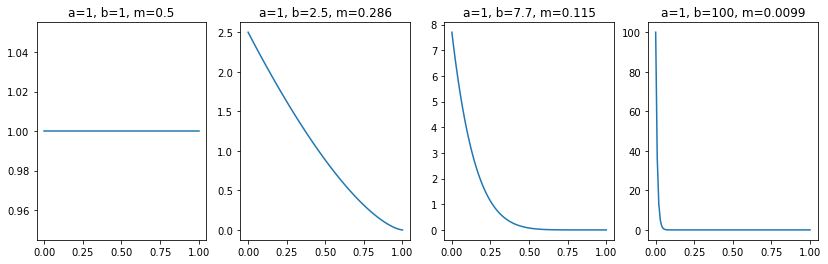

In [21]:
fig, axes = plt.subplots(1,4, figsize=(14,4))
x = np.linspace(0,1,100)
for ax, b in zip(axes, [1, 2.5, 7.7, 100]):
    ax.plot(x, stats.beta.pdf(x, a=1, b=b))
    ax.set_title(f'a=1, b={b}, m={1./(1+b):.3}')

Since we want to control the magnitude of the probability sample from beta(), we fix $a=1$.
- when $b=1$, it is flat; any probabilty beteween $[0,1]$ is possible.
- when $b=100$, the average value of draws from beta(1,100) is 0.0099, or 0.01 approximately. So we may break the stick into many small pieces.

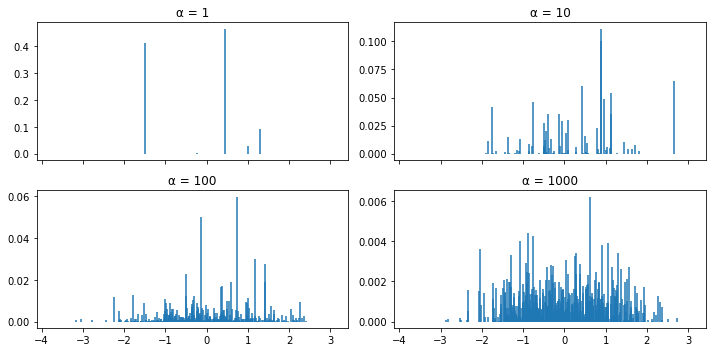

In [23]:
# Parameters DP
K = 500
H = stats.norm
alphas = [1, 10, 100, 1000]  # this alpha is basically the b in beta dist.

# plot
_, ax = plt.subplots(2, 2, sharex=True, figsize=(10, 5))
ax = np.ravel(ax)
for idx, α in enumerate(alphas):
    locs, w = stick_breaking_truncated(α, H, K)
    ax[idx].vlines(locs, 0, w, color='C0')
    ax[idx].set_title('α = {}'.format(α))

plt.tight_layout()

In [25]:
α = 1
locs, w = stick_breaking_truncated(α, H, K)
locs.shape, w.shape

((500,), (500,))

In [71]:
size=20
bs = stats.beta.rvs(1, α, size=size); 
print('bs: ', bs)
print('1-bs: ', 1 - bs)
cp = np.concatenate( ([1.], np.cumprod(1-bs[:-1])) )
print('cp: ', cp.shape, cp)
w = bs * cp
print('w : ', w.shape, w)

bs:  [0.31014307 0.14909707 0.79393182 0.50729676 0.64410713 0.05218328
 0.76922989 0.75319422 0.67350039 0.30546767 0.41726707 0.94970278
 0.50687171 0.42888572 0.50443266 0.75306927 0.12339573 0.24150022
 0.67982717 0.95034252]
1-bs:  [0.68985693 0.85090293 0.20606818 0.49270324 0.35589287 0.94781672
 0.23077011 0.24680578 0.32649961 0.69453233 0.58273293 0.05029722
 0.49312829 0.57111428 0.49556734 0.24693073 0.87660427 0.75849978
 0.32017283 0.04965748]
cp:  (20,) [1.00000000e+00 6.89856927e-01 5.87001279e-01 1.20962287e-01
 5.95985100e-02 2.12106850e-02 2.01038419e-02 4.63936576e-03
 1.14502227e-03 3.73849323e-04 2.59650440e-04 1.51306862e-04
 7.61031480e-06 3.75286150e-06 2.14331280e-06 1.06215582e-06
 2.62278910e-07 2.29914813e-07 1.74390335e-07 5.58350477e-08]
w :  (20,) [3.10143073e-01 1.02855647e-01 4.66038993e-01 6.13637765e-02
 3.83878250e-02 1.10684305e-03 1.54644762e-02 3.49434349e-03
 7.71172945e-04 1.14198883e-04 1.08343578e-04 1.43696547e-04
 3.85745330e-06 1.60954870e

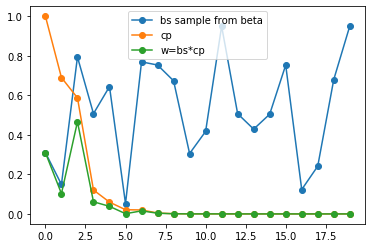

In [72]:
plt.plot(bs, '-o', label='bs sample from beta')
plt.plot(cp, '-o', label='cp')
plt.plot(w, '-o', label='w=bs*cp')
plt.legend();

In [78]:
# stick-breaking, one by one
bs[1]*(1-bs[0]), bs[2]*(1-bs[1])*(1-bs[0]), (bs[-1]*np.cumprod(1-bs[:-1]))[-1]

(0.10285564743940934, 0.46603899288915207, 5.3062419989947344e-08)

In [80]:
# check, the sum may not be close to zeo due to truncation. I would add w = w/w.sum().
w.sum()

0.9999999972273723

In [81]:
ww = w / w.sum()
ww.sum()

0.9999999999999998